<a href="https://colab.research.google.com/github/chandrakanta-chaudhury/deep_learning-/blob/master/pytorch_gpu_CIFAR1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import matplotlib.pyplot as plt
import numpy as np
import torch

In [0]:
import torchvision
import torchvision.transforms as transforms
import torch.nn as nn
import torch.optim as optim


In [0]:
device=torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [4]:
print(device)

cuda:0


In [0]:
transform_train=transforms.Compose([transforms.RandomResizedCrop(224),transforms.ToTensor(),transforms.Normalize((0.5,0.5,0.5),(0.5,0.5,0.5)),])

In [0]:
transform_test=transforms.Compose([transforms.RandomResizedCrop(224),transforms.ToTensor(),transforms.Normalize((0.5,0.5,0.5),(0.5,0.5,0.5)),])

In [7]:
trainset=torchvision.datasets.CIFAR10(root='/home/chandrakanta/Downloads',train=True,download=True,transform=transform_train)

0it [00:00, ?it/s]


0it [00:00, ?it/s]
  0%|          | 32768/170498071 [00:00<08:41, 327142.91it/s]

Failed download. Trying https -> http instead. Downloading http://www.cs.toronto.edu/~kriz/cifar-10-python.tar.gz to /home/chandrakanta/Downloads/cifar-10-python.tar.gz



 99%|█████████▉| 168747008/170498071 [00:02<00:00, 73607833.15it/s]
170500096it [00:02, 74916099.67it/s]                               


In [8]:
testset=torchvision.datasets.CIFAR10(root='/home/chandrakanta/Downloads',train=False,download=True,transform=transform_test)

Files already downloaded and verified


In [0]:
num_classes=10
batch_size=4


In [0]:
trainloader=torch.utils.data.DataLoader(trainset,batch_size=batch_size,shuffle=True)


In [0]:
dataiter=iter(trainloader)
images,labels=dataiter.next()


In [14]:
print(images.shape)

torch.Size([4, 3, 224, 224])


In [15]:
print(images[1].shape)
print(labels[1].item())

torch.Size([3, 224, 224])
3


In [0]:
def imshow(img,title):
  npimg=img.numpy()/2 + 0.5 
  plt.figure(figsize=(batch_size,1))
  plt.axis('off')
  plt.imshow(np.transpose(npimg,(1,2,0)))
  plt.title(title)
  plt.show()

In [0]:
def show_batch_images(dataloader):
  images,labels =next(iter(dataloader))
  img=torchvision.utils.make_grid(images)
  imshow(img,title=[str(x.item()) for x in labels])
  

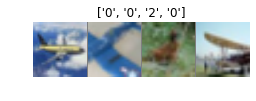

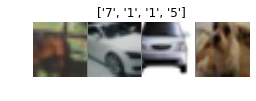

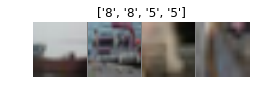

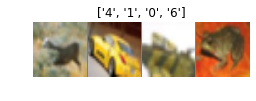

In [20]:
for i in range(4):
  show_batch_images(trainloader)